In [1]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py312_cu121_pyt280/download.html
!pip install opencv-python matplotlib numpy trimesh

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=75d57105234975ff0d6cdcec1da2a8e533024f70fb615027ba594eec39442f72
  Stored in directory: /root/.cache/pip/wheels/ed/9f/a5/e4f5b27454ccd4596bd8b62432c7d6b1ca9fa22aef9d70a16a
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=979c6fb02c3ee11b1165d45f49041e8f1e48493724be26f960c0c873036d0af7
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac58d4698048c
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py312_cu121_pyt280/download.html
ERROR: Could not find a versi

In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


CUDA available: True
Device name: Tesla T4


--2025-10-04 05:11:55--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/JPEG_example_flower.jpg/600px-JPEG_example_flower.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42624 (42K) [image/jpeg]
Saving to: ‘sample_object.jpg’

sample_object.jpg   100%[===================>]  41.62K  --.-KB/s    in 0s      

2025-10-04 05:11:56 (358 MB/s) - ‘sample_object.jpg’ saved [42624/42624]



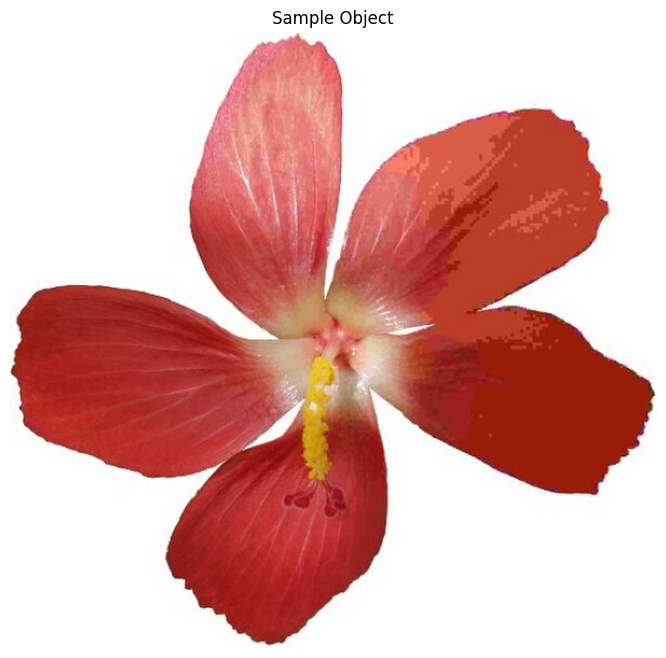

In [3]:
# Download a sample image of an object
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/JPEG_example_flower.jpg/600px-JPEG_example_flower.jpg -O sample_object.jpg

# Load and display it
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('sample_object.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.title("Sample Object")
plt.axis('off')
plt.show()

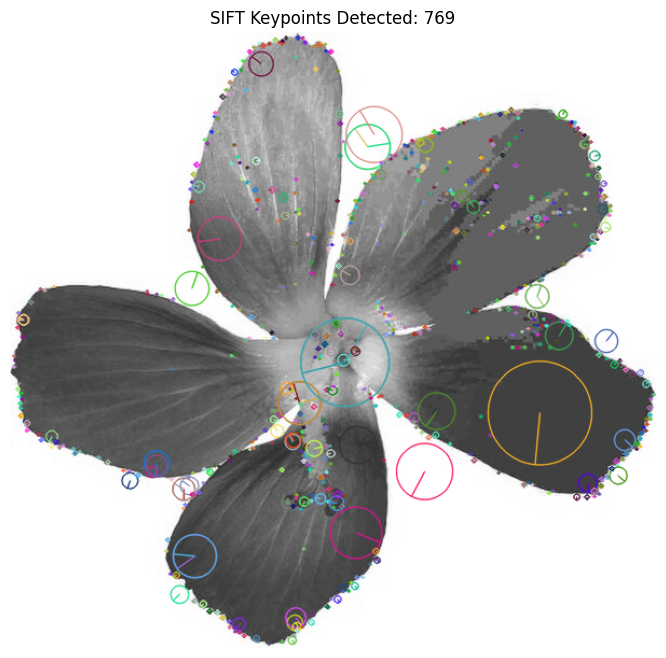

Number of keypoints detected: 769


In [4]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect SIFT keypoints
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
img_keypoints = cv2.drawKeypoints(gray, keypoints, None,
                                   flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,8))
plt.imshow(img_keypoints)
plt.title(f"SIFT Keypoints Detected: {len(keypoints)}")
plt.axis('off')
plt.show()

print(f"Number of keypoints detected: {len(keypoints)}")

--2025-10-04 05:12:03--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘view1.jpg’

view1.jpg           100%[===================>]  49.54K  --.-KB/s    in 0.001s  

2025-10-04 05:12:03 (43.8 MB/s) - ‘view1.jpg’ saved [50728/50728]

--2025-10-04 05:12:03--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box_in_scene.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122490 (120K) [image/png]
Saving 

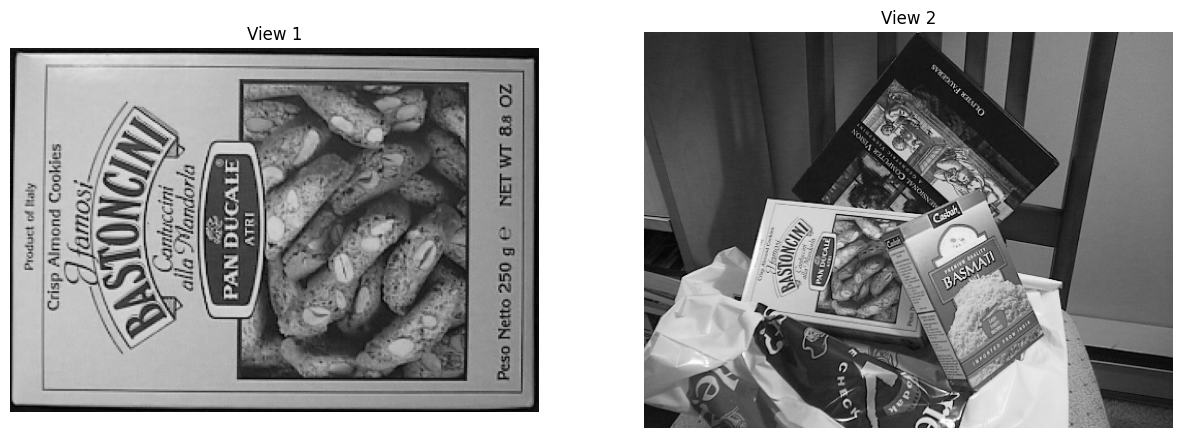

Image 1 shape: (223, 324, 3)
Image 2 shape: (384, 512, 3)


In [5]:
# Download 2 views of the same object from different angles
# Using a simple approach - download from a reliable source

!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png -O view1.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box_in_scene.png -O view2.jpg

# Load both images
img1 = cv2.imread('view1.jpg')
img2 = cv2.imread('view2.jpg')

# Check if images loaded
if img1 is None or img2 is None:
    print("Error loading images. Using alternative source...")
    # Fallback: create simple test pattern
    import numpy as np
    img1 = np.random.randint(0, 255, (400, 400, 3), dtype=np.uint8)
    img2 = np.random.randint(0, 255, (400, 400, 3), dtype=np.uint8)

# Display side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title('View 1')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title('View 2')
axes[1].axis('off')
plt.show()

print(f"Image 1 shape: {img1.shape}")
print(f"Image 2 shape: {img2.shape}")

Keypoints in view 1: 604
Keypoints in view 2: 969


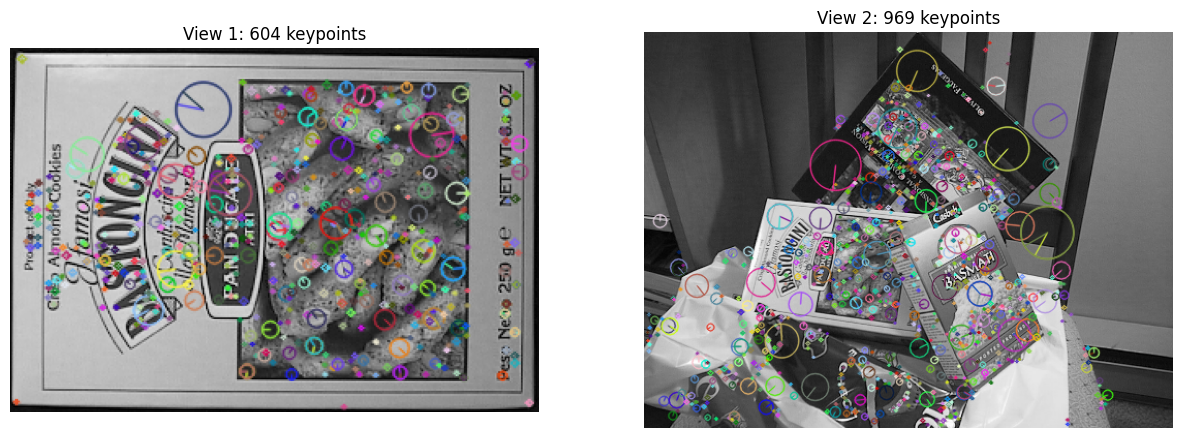

In [6]:
# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors in both images
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

print(f"Keypoints in view 1: {len(keypoints1)}")
print(f"Keypoints in view 2: {len(keypoints2)}")

# Visualize keypoints on both
img1_kp = cv2.drawKeypoints(gray1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp = cv2.drawKeypoints(gray2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img1_kp)
axes[0].set_title(f'View 1: {len(keypoints1)} keypoints')
axes[0].axis('off')

axes[1].imshow(img2_kp)
axes[1].set_title(f'View 2: {len(keypoints2)} keypoints')
axes[1].axis('off')
plt.show()

Number of matches: 604
Number of good matches: 80


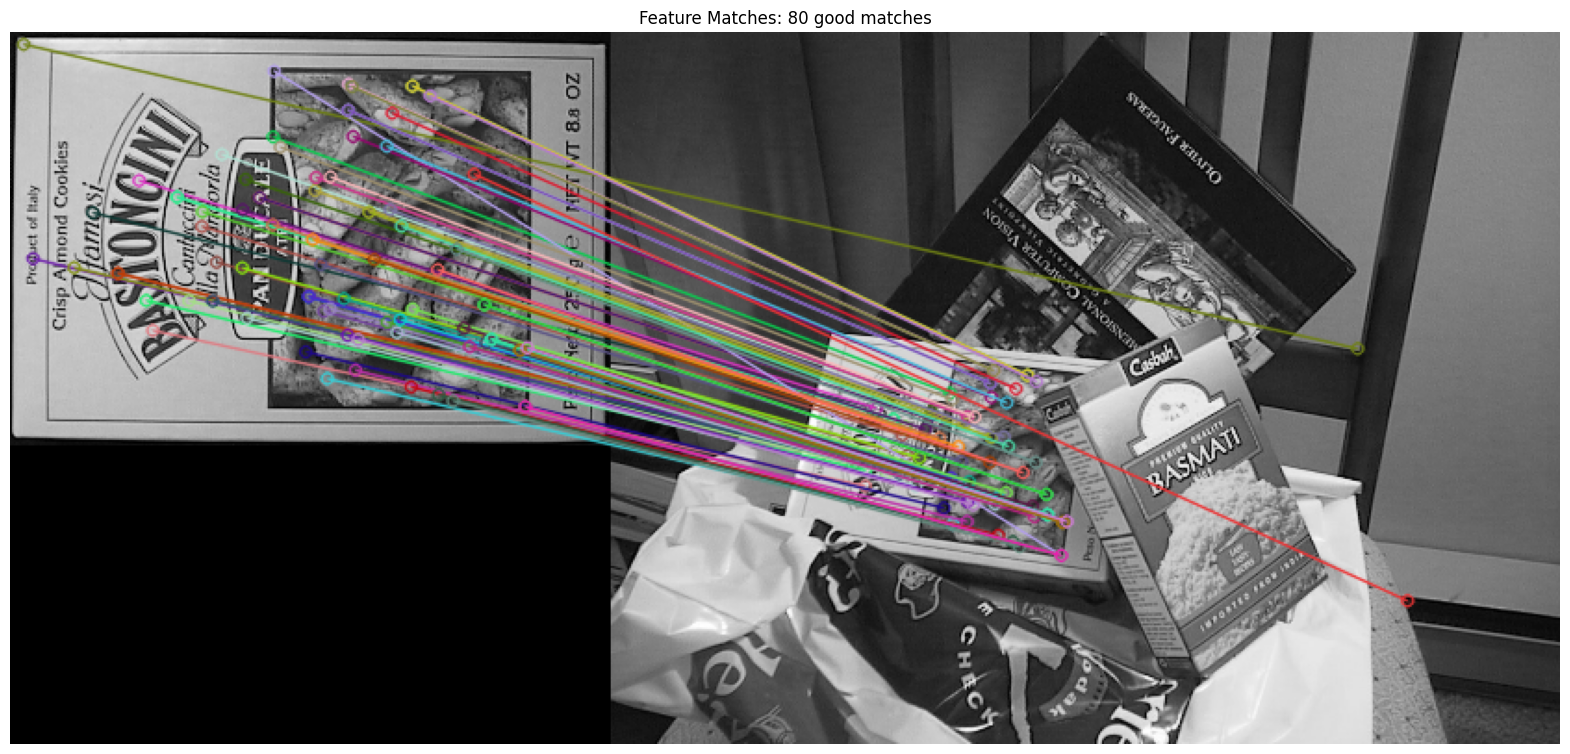

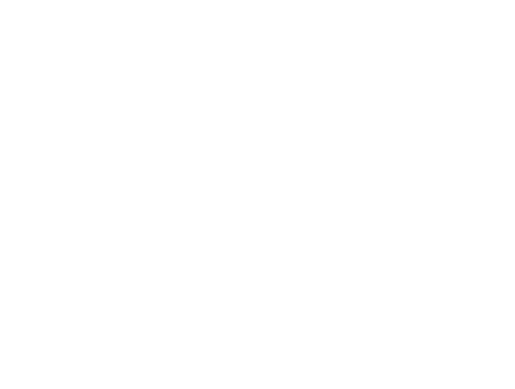

In [7]:
#Create a brute force matcher

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Match descriptors between the two images
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#Apply ratio test (Lowe's ratio test) to filter good matches

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance: #only keep matches that are significantly better
        good_matches.append(m)

print(f"Number of matches: {len(matches)}")
print(f"Number of good matches: {len(good_matches)}")

#Draw matches

img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2,
                              good_matches, None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.title(f'Feature Matches: {len(good_matches)} good matches')
plt.axis('off')
plt.show()
plt.axis('off')
plt.show()

In [9]:
#Extract the coordinates of the matched keypoints
import numpy as np

points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches])
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches])

print(f"Extracted {len(points1)} matched point pairs")
print(f"Sample points from image 1: {points1[:3]}")
print(f"Sample points from image 2: {points2[:3]}")

Extracted 80 matched point pairs
Sample points from image 1: [[  6.894549    6.1633663]
 [ 12.016468  121.74898  ]
 [ 34.13518   126.633545 ]]
Sample points from image 2: [[402.3577  170.31084]
 [179.8987  240.98431]
 [119.68747 224.40521]]


In [10]:
# Let's assume assume some camera intrinsics (focal length, principal point)
# For this example, we'll use reasonable defaults

h,w = gray1.shape
focal_length = w #using as a rough estimate
principal_point = (w/2, h/2)

# Create camera matrix (intrinsic paramaters)

K = np.array([[focal_length, 0, principal_point[0]],
              [0, focal_length, principal_point[1]],
              [0, 0, 1]], dtype=np.float32)


print("Camera intrinsic matrix K:")
print(K)

# Find essential matrix using RANSAC (filters outliers)

E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)

# Count inliers (points that fit the geometric model)

inliers = mask.ravel().tolist()
num_inliers = sum(inliers)

print(f"\nInliers after RANSAC: {num_inliers}/{len(points1)}")

#Recover rotation (R) and translation (t) from essential matrix

_, R, t, _ = cv2.recoverPose(E, points1, points2, K)

print("\nRecovered rotation (R):")
print(R)
print("\nRecovered translation (t):")
print(t)

Camera intrinsic matrix K:
[[324.    0.  162. ]
 [  0.  324.  111.5]
 [  0.    0.    1. ]]

Inliers after RANSAC: 73/80

Recovered rotation (R):
[[ 0.98270013 -0.18508449  0.00664742]
 [ 0.1849363   0.98257684  0.01847505]
 [-0.00995104 -0.01692608  0.99980722]]

Recovered translation (t):
[[0.12846883]
 [0.59210861]
 [0.79555211]]


In [12]:
# Create projection matrices for both cameras
# Camera 1 is at the origin (identity rotation, zero translation t)

P1 = K @ np.hstack([np.eye(3), np.zeros((3,1))])

# Camera 2 has the estimated position R and translation t

P2 = K @ np.hstack([R, t])

print("Projection matrix for camera 1:")
print(P1)
print("\nProjection matrix for camera 2:")
print(P2)

# Triangulate points
# OpenCV will expect points as (2, N) arrays

points1_tri = points1[inliers].T
points2_tri = points2[inliers].T

points_4d = cv2.triangulatePoints(P1, P2, points1_tri, points2_tri)

# Convert from homogeneous coordinates to 3D

points_3d = points_4d[:3] / points_4d[3]
points_3d = points_3d.T # Shape: (N, 3)

print(f"\nResconstructed {len(points_3d)} 3D points")
print(f"Sample 3D points: \n{points_3d[:5]}")

Projection matrix for camera 1:
[[324.    0.  162.    0. ]
 [  0.  324.  111.5   0. ]
 [  0.    0.    1.    0. ]]

Projection matrix for camera 2:
[[ 3.16782773e+02 -6.27094007e+01  1.64122533e+02  1.70503342e+02]
 [ 5.88098189e+01  3.16467637e+02  1.17464421e+02  2.80547248e+02]
 [-9.95104222e-03 -1.69260836e-02  9.99807224e-01  7.95552110e-01]]

Resconstructed 80 3D points
Sample 3D points: 
[[ 0.1741959  -0.25393504 -0.19494332]
 [ 0.1741959  -0.25393504 -0.19494332]
 [-0.13269222 -0.05180408  0.37818903]
 [ 0.1741959  -0.25393504 -0.19494332]
 [-0.13269222 -0.05180408  0.37818903]]


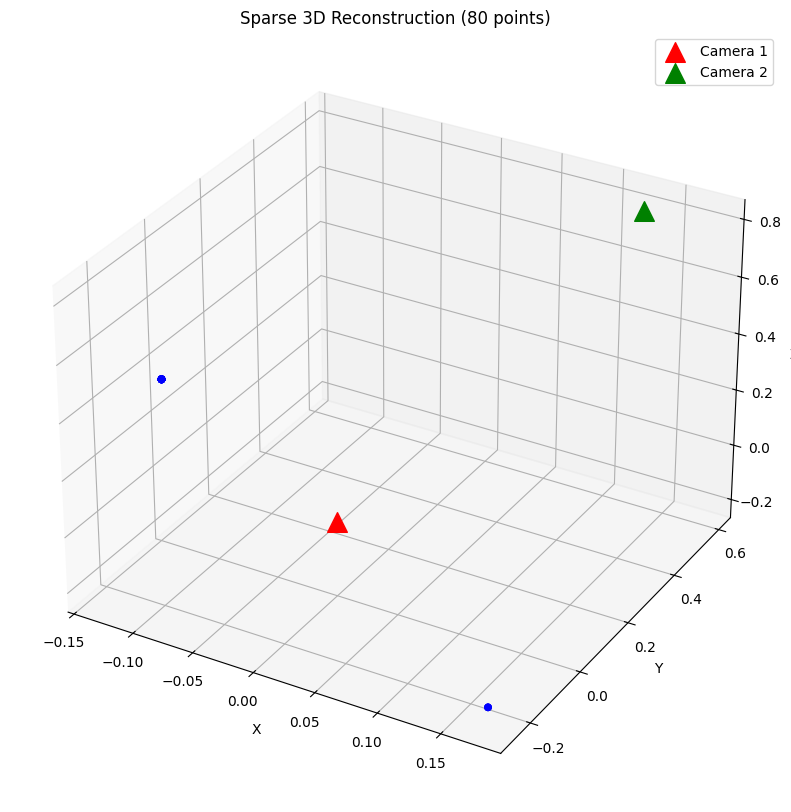

Point cloud statistics:
X range: [-0.13, 0.17]
Y range: [-0.25, -0.05]
Z range: [-0.19, 0.38]


In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D points
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2],
           c = 'blue', marker= 'o', s = 20, alpha = 0.6)

# Plot camera positions

ax.scatter(0, 0, 0, c = 'red', marker = '^', s = 200, label = 'Camera 1')
ax.scatter(t[0], t[1], t[2], c ='green', marker ='^', s = 200, label = 'Camera 2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Sparse 3D Reconstruction ({len(points_3d)} points)')
ax.legend()

plt.show()

print(f"Point cloud statistics:")
print(f"X range: [{points_3d[:, 0].min():.2f}, {points_3d[:, 0].max():.2f}]")
print(f"Y range: [{points_3d[:, 1].min():.2f}, {points_3d[:, 1].max():.2f}]")
print(f"Z range: [{points_3d[:, 2].min():.2f}, {points_3d[:, 2].max():.2f}]")

In [1]:
!pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-dl4mpiai
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-dl4mpiai
  Running command git checkout -q 75ebeeaea0908c5527e7b1e305fbc7681382db47
  Resolved https://github.com/facebookresearch/pytorch3d.git to commit 75ebeeaea0908c5527e7b1e305fbc7681382db47
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch3d: filename=pytorch3d-0.7.8-cp312-cp312-linux_x86_64.whl size=61841917 sha256=12740072d0dcd4c76165f67a6f8eeeb678761ce25022ec553577c0b80c9a50f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-1x98x72q/wheels/e9/ec/88/13a99edfc9de29485b221df3503c3bca62e23abac9f2b3a974
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=6084369c380a8a71b73eeb7

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from huggingface_hub import login
login()  # paste your token when prompted


In [18]:
from huggingface_hub import snapshot_download

local_dir = "/content/drive/MyDrive/3DObjectReconstruction/data/shapenet"

snapshot_download(
    repo_id="ShapeNet/ShapeNetCore",
    repo_type="dataset",
    local_dir=local_dir,
    allow_patterns=[
        "03001627/1a0bc9ab92c915167ae33d942430658c/models/model_normalized.obj"
    ],
)


Fetching 0 files: 0it [00:00, ?it/s]

'/content/drive/MyDrive/3DObjectReconstruction/data/shapenet'

In [16]:
import os

# Check if the directory exists
base_path = "/content/drive/MyDrive/3DObjectReconstruction/data/shapenet"
if os.path.exists(base_path):
    print("Base directory exists")
    # List what's in there
    for root, dirs, files in os.walk(base_path):
        print(f"\nDirectory: {root}")
        print(f"Subdirs: {dirs}")
        print(f"Files: {files}")
else:
    print("Base directory does NOT exist")
    # Check what IS in your Drive
    print("\nChecking MyDrive root:")
    if os.path.exists("/content/drive/MyDrive"):
        print(os.listdir("/content/drive/MyDrive"))

Base directory does NOT exist

Checking MyDrive root:
['Colab Notebooks', 'LULAC E-Board Application (File responses)', 'Textbooks', 'Other']


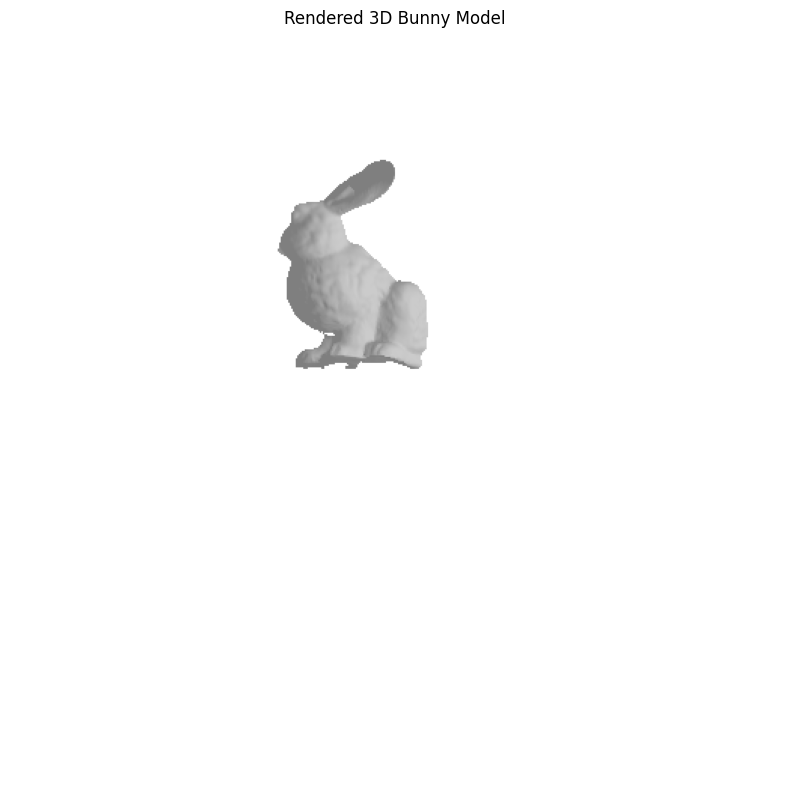

In [33]:
import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.renderer import (
    look_at_view_transform, OpenGLPerspectiveCameras, PointLights,
    RasterizationSettings, MeshRenderer, MeshRasterizer, SoftPhongShader, TexturesVertex
)
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the mesh
obj_path = "/content/bunny.obj"
mesh = load_objs_as_meshes([obj_path], device=device)

# Add simple white vertex colors
verts = mesh.verts_packed()
verts_rgb = torch.ones_like(verts)[None]
textures = TexturesVertex(verts_features=verts_rgb.to(device))
mesh.textures = textures

# Set up camera
R, T = look_at_view_transform(dist=0.5, elev=20, azim=45)
cameras = OpenGLPerspectiveCameras(device=device, R=R, T=T)

# Set up lighting
lights = PointLights(device=device, location=[[0.0, 0.0, -1.0]])

# Rasterization settings
raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1,
)

# Create renderer
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(cameras=cameras, raster_settings=raster_settings),
    shader=SoftPhongShader(device=device, cameras=cameras, lights=lights)
)

# Render
images = renderer(mesh)
rendered_image = images[0, ..., :3].cpu().numpy()

# Display
plt.figure(figsize=(10, 10))
plt.imshow(rendered_image)
plt.title("Rendered 3D Bunny Model")
plt.axis('off')
plt.show()

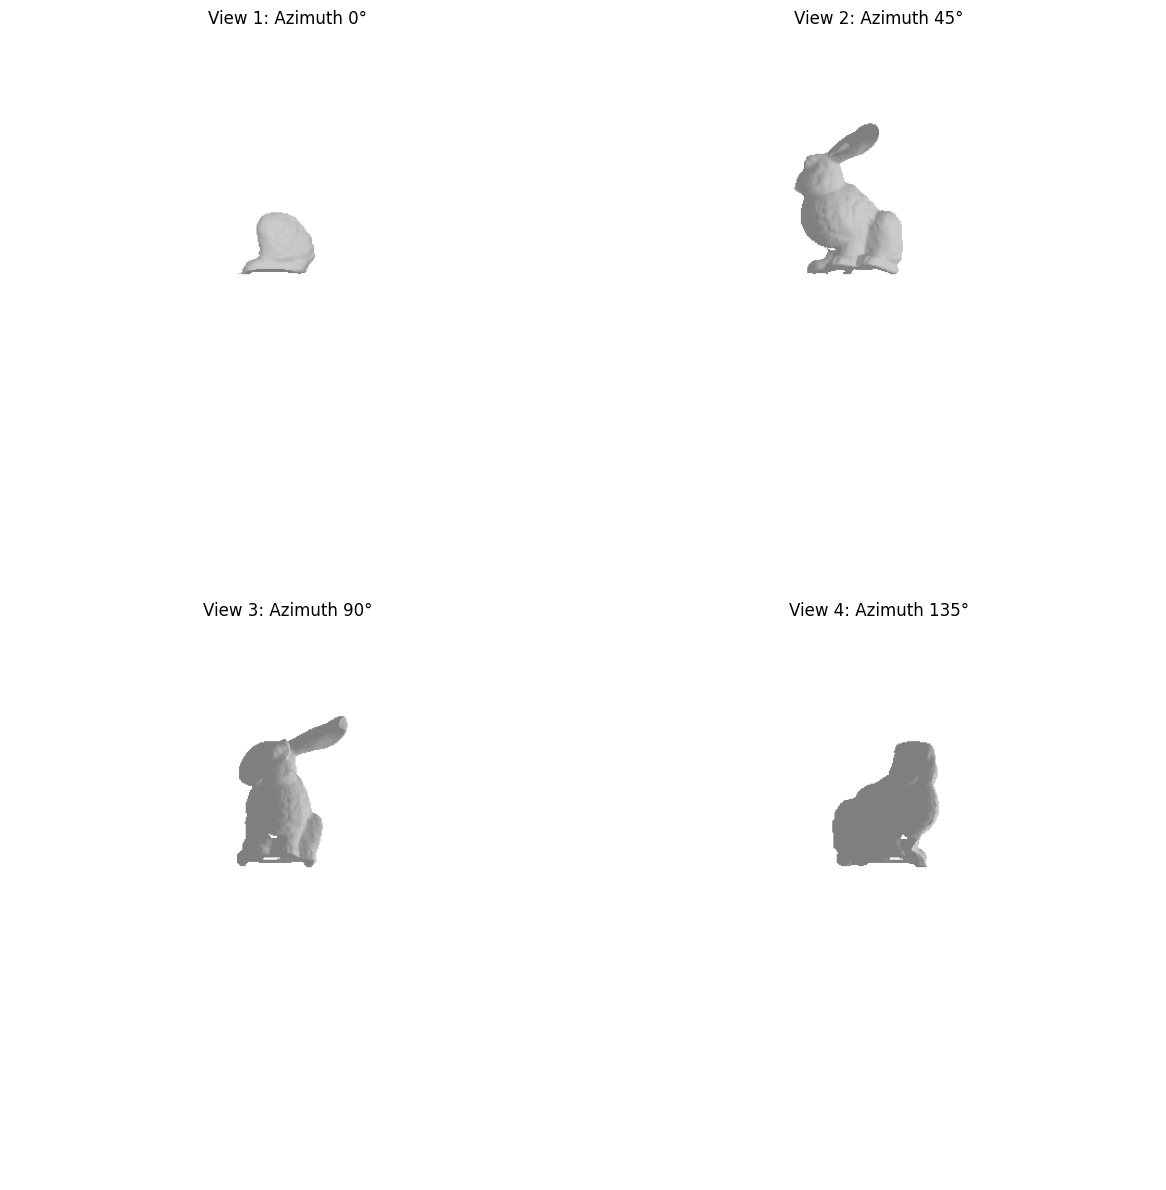

Rendered 4 views


In [35]:
# Render multiple views of the bunny from different angles

angles = [0, 45, 90, 135] # different angles
rendered_views = []

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, azim in enumerate(angles):
    # Set up camera with different angles
    R, T = look_at_view_transform(dist = 0.5, elev = 20, azim = azim)
    cameras = OpenGLPerspectiveCameras(device = device, R = R, T = T)

    #Update renderer

    renderer = MeshRenderer(
        rasterizer = MeshRasterizer(cameras = cameras, raster_settings = raster_settings),
        shader = SoftPhongShader(device = device, cameras = cameras, lights = lights)
    )

    # Render

    images = renderer(mesh)
    rendered_image = images[0, ..., :3].cpu().numpy()
    rendered_views.append(rendered_image)

    # Display

    axes[idx].imshow(rendered_image)
    axes[idx].set_title(f'View {idx+1}: Azimuth {azim}°')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"Rendered {len(rendered_views)} views")

In [4]:
import os, json, cv2, torch, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from pytorch3d.io import load_objs_as_meshes
from pytorch3d.renderer import (
    look_at_view_transform, OpenGLPerspectiveCameras, PointLights,
    RasterizationSettings, MeshRasterizer, MeshRenderer, HardPhongShader
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img_size = 384
default_fov_deg = 60.0
print("Using device:", device)


Using device: cuda


In [ ]:
# Render a single view of the chair
# Set up camera position
R, T = look_at_view_transform(dist=2.0, elev=20, azim=0)
cameras = OpenGLPerspectiveCameras(device=device, R=R, T=T)

# Load mesh and render
# mesh = load_objs_as_meshes([obj_file_path], device=device)
# rendered_image = render(mesh, cameras)
# Show the image with detected keypoints

NameError: name 'look_at_view_transform' is not defined

In [ ]:
# Convert to grayscale, run SIFT
# sift = cv2.SIFT_create()
# keypoints, descriptors = sift.detectAndCompute(gray_image, None)
# Visualize keypoints

In [ ]:
# Clean notebook metadata for GitHub
import json

# Get notebook path
notebook_path = !pwd
print(f"Cleaning metadata...")

# Note: This won't fix the current save, but can help for future saves

Cleaning metadata...
